In [1]:
import matplotlib
# matplotlib.use('tkagg')
import pandas as pd 
import numpy as np
import os 
import sys
import pickle 

In [ ]:
import json 
PATH = '/home/dproios/work/AIME_DS4DH/data'
sentences = pickle.loads(open('/home/dproios/automated_phenotyping/sentences_time_val_categorized.pickle', 'rb').read())

os.listdir(PATH),type(sentences)
sentences[0] #, json.load(["DEM_M", "DEM_BLACK", "DEM_YOUNG", "DEM_ALIVE", "DIA_P84", "DIA_P002", "DIA_Z23", "DIA_Y92199", "DIA_Y838", "DIA_Z3800", "DIA_D7801", "LOC_NICU", "LAB_50802:OK", "LAB_50804:AB", "LAB_50818:AB", "LAB_52033:OK", "LAB_50813:AB", "LAB_50820:AB", "LAB_50821:AB", "LAB_51221:OK", "LAB_51144:OK", "LAB_51146:OK", "LAB_51200:OK", "LAB_51251:AB", "LAB_51222:OK", "LAB_51244:OK", "LAB_51248:AB", "LAB_51254:OK", "LAB_51143:OK", "LAB_51255:OK", "LAB_51256:AB", "LAB_51296:OK", "LAB_51287:OK", "LAB_51267:OK", "LAB_51260:OK", "LAB_51266:OK", "LAB_51252:OK", "LAB_51233:OK", "LAB_51249:AB", "LAB_51137:OK", "LAB_51268:OK", "LAB_51134:OK", "LAB_51301:OK", "LAB_51279:OK", "LAB_51277:AB", "LAB_51265:OK", "LAB_51257:AB", "LAB_51246:OK", "LAB_51250:AB", "MED_060304", "MED_009117", "MED_001978", "MED_002302", "MED_007948", "MED_001210", "MED_062017", "MED_008937", "MED_062017", "LAB_50820:OK", "LAB_50818:OK", "LAB_50816:OK", "LAB_50804:OK", "PRO_5A09357", "MED_009117", "MED_062017", "MED_062017", "LOC_NUR", "MED_062678", "PRO_3E0336Z", "LAB_50883:AB", "LAB_50884:OK", "LAB_50885:AB", "MED_016947", "MED_060675", "PRO_0W300ZZ", "PRO_0VTT0ZZ"])

In [4]:
FPATH = os.path.join('/home/dproios/work/automated_phenotyping/data/datasets/autophe/time_categorized')
os.listdir(FPATH)

['sentences_time_train_categorized.json',
 'sentences_time_test_categorized.txt']

In [217]:
# !head /home/dproios/work/automated_phenotyping/data/datasets/autophe/time_categorized/sentences_time_train_categorized.json

# load model  

In [1]:
import models 
config_path = './config.toml'

ModuleNotFoundError: No module named 'toml'

In [ ]:

# pipeline = data.DataPipeline(data_params,run_params,train_params,model_params)
import data 

modelfn, run_params, data_params, train_params, model_params = models.load_model_and_params_from_config(config_path)
pipeline = data.DataPipeline(data_params,run_params,train_params,model_params)
model_params['vocab_sizes'] = pipeline.tokenizer.vocab_sizes
params_dict = {**model_params, **run_params, **data_params, **train_params}

model = modelfn(**params_dict)
run_params, data_params, train_params, model_params, model, 

In [ ]:
len([ w  for w in pipeline.tokenizer.get_vocab()])

1933

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd 


def compute_reduced_representation(embeddings, algorithm='pca', n_dims=2):
    if algorithm == 'pca':
        return PCA().fit_transform(embeddings)[:, :n_dims]
    elif algorithm == 'tsne':
        params = {'learning_rate': 'auto', 'init': 'pca'}
        return TSNE(n_dims, **params).fit_transform(embeddings)
    else:
        raise ValueError('Invalid algorithm name (pca, tsne).')

all_rows =[] 
for cat in ['MED','DIA', 'LAB', 'LOC', 'DEM' , 'PRO']:
    all_rows.append(pd.DataFrame([
        {
            'category': w.split('_')[0], 
            'word':w
        } 
        for w in pipeline.tokenizer.get_vocab() 
        if (
            w!=(cat+'_')  # filter out category tokens 'MED_' 'DIA_' etc
            and w.split('_')[0] == cat) # exclude words that don't start with 'UNK' 'PAD' 'P' O X  MED_XX DIA_XX etc
    ]))
df = pd.concat(all_rows).reset_index(drop=True)


# icd - complex mapping 
{'complex_disease1: ['icd1','icd2'...]}

## visualization <- see what fernando did |  Fig3 
> include  one category of tokens per time -> inidvidual tokens (medication|procedure|diagnoss|)
> most populous 
> > histogram below legend
> maybe later per epoch gif of change
> plot on data_pipeline file fn: 
>     def test_epoch_end(self, output):
        pass
        # metrics.clustering_task_ehr(self.model, self.pipeline.tokenizer)
        # metrics.prediction_task_ehr(self.model, test_data_dir)

####  use tensorboard  to put the images 
train.py            self.log('%s_%s' % (mode, k), v.cpu().detach(), batch_size=btch_sz)
copy of utils.py logger with writer 
#### https://github.com/albornet/transformer_zoo/blob/master/train.py
self.logger.experiment.add_image
for example

v https://github.com/albornet/transformer_zoo/blob/master/train.py
self.logger.experiment.add_image
for example
self being the PL module

data\metrics\prediction.py

### medication 
aspirint drugs 
cardiagn

### proceduers 


## stratification clustering  complex disease -> not pca MYFIGURE here 

admission - diagnosis - medication 
cluster = truth label ? diagnosis 

admission | complex truth label = subclusters 
ICD = sublcuster 


## prediction_task_ehr  Fig 2 
> takes the whole admission (diagnosis exclusion of word tokens) -> take sequence embedding  cosine similarity 
> patients without diagnosis - weighted mean -- Done from Alban weights are the inverse frequency of token in the dataset 
kNN in full / dimensionality reduction 



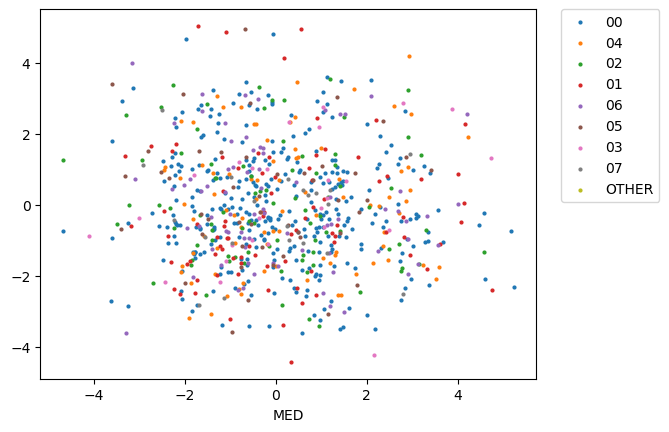

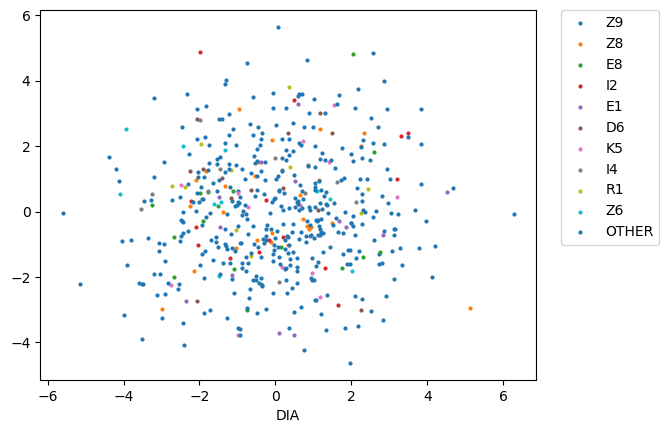

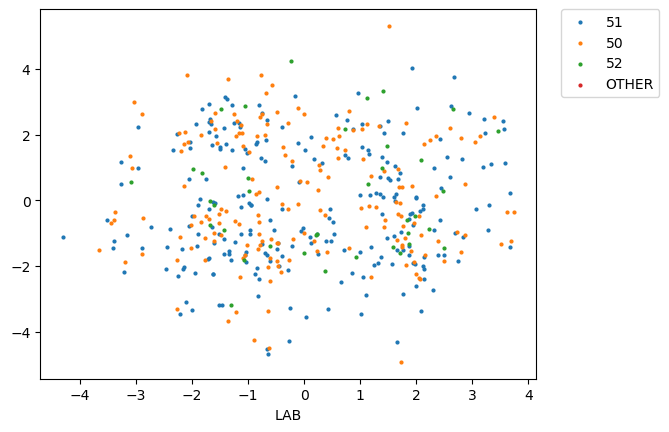

In [ ]:
import torch 
import matplotlib.pyplot as plt

# def derive_number_of_chars(words: list, min_label_length=1, max_label=10): 
#     word_list = [w.split('_')[1] for w in words]
#     # get word with min length in_list
#     min_word = min(word_list, key=len)
#     # number of distinct values per XX first characters used from ICD code
#     arr = [pd.Series([w.split('_')[1][:i] for w in words]).value_counts().shape[0] for i in range(1, len(min_word))]
#     # get the max arr value below 10
#     farr = [i for i in arr if i <= max_label and i >=min_label_length]
#     # get sort array
#     if len(farr ) ==0 :
#         raise ValueError('No suitable labels found - too big/small {}'.format(arr))
#     value_of_label_number = sorted(farr, reverse=True)[0]
#     num_chars = [i for i in range(1, len(min_word)+1)]
#     # index of value in array
#     index_of_value = arr.index(value_of_label_number)
#     number_of_chars= num_chars[index_of_value]
#     return number_of_chars

def visualize(reduced, labels):
    for i in labels_list:
        to_vis= reduced[:,dfc['label'] == i]
        plt.scatter(*to_vis, s=4)
    plt.legend(labels_list)
    # plt legend right out of the box 
    plt.legend(labels_list, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    # plt disable ticks 
    # plt.xticks([])
    # plt.yticks([])
    plt.xlabel(cat)
    plt.show()
    # plt.scatter(reduced)
# rows_of_category,tokens, embeddings[0].shape

# convert tensor to numpy

def get_most_populous_labels(words: list, number_of_chars): 
    word_list = [w.split('_')[1] for w in words]
    # get word with min length in_list
    arr = pd.Series([w.split('_')[1][:number_of_chars] for w in words]).value_counts().index.to_list()
    return arr[:10]

    
number_of_chars = 2 
for cat in ['MED','DIA', 'LAB', #'LOC', 
            #'DEM' , 
            #'PRO'
            ]:
    dfc = df[df['category'] == cat].copy()
    words = dfc['word']
 
    labels_list = get_most_populous_labels(words, number_of_chars)

    dfc['label'] = dfc['word'].apply(
        lambda x: x.split('_')[1][:number_of_chars] 
        if (x.split('_')[1][:number_of_chars] in labels_list) 
        else 'OTHER'
    )
    labels_list = labels_list + ['OTHER']
    tokens = words.apply(lambda x: pipeline.tokenizer.encode(x))
    
    embeddings = model.get_token_embeddings(tokens)
    
    # reduce  dimensionality
    reduced = compute_reduced_representation(embeddings, algorithm='pca', n_dims=2).reshape(2,-1)
    
    visualize(reduced, dfc['label'])



# clustering 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

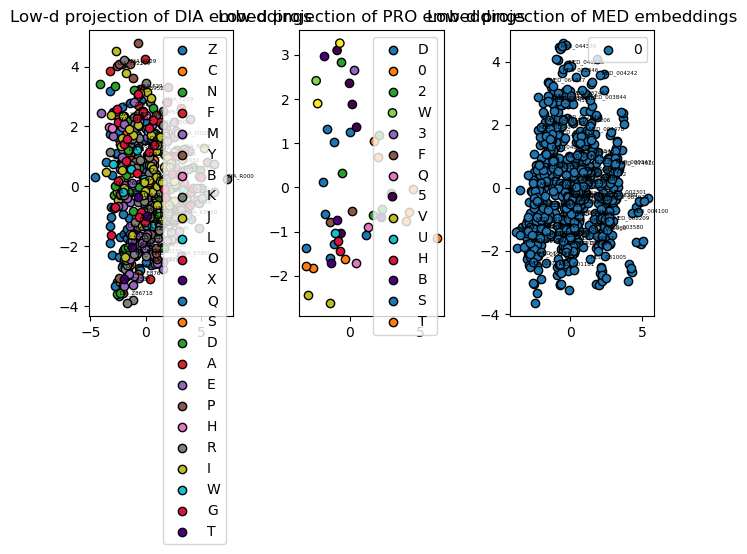

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# all_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'w'] * 10
all_colors = (list(plt.cm.tab10(np.arange(10))) + ["crimson", "indigo"]) * 10


def clustering_task_ehr(model, tokenizer):
    model.eval()  # may not be needed when used from test_fn
    fig = plt.figure()
    for i, category in enumerate(['DIA_', 'PRO_', 'MED_']):
        
        token_info = get_token_info(model, tokenizer, category)
        reduced = compute_reduced_representation(token_info['embedded'])        
        unique_initials = list(set(token_info['initials']))
        unique_colors = all_colors[:len(unique_initials)]

        kwargs = {} if reduced.shape[-1] <= 2 else {'projection': '3d'}
        ax = fig.add_subplot(1, 3, i + 1, **kwargs)
        ax.set_title('Low-d projection of %s embeddings' % category[:-1])
        for initial, color in zip(unique_initials, unique_colors):
            sub_category_indices = np.where(token_info['initials'] == initial)
            data = reduced[sub_category_indices]
            data = [data[:, i] for i in range(data.shape[-1])]
            ax.scatter(*data, c=color, edgecolors='k', label=initial)
            ax.legend()

        for word, coord in zip(token_info['tokens'], reduced):
            if np.random.rand() < 0.1:
                coord = [c + 0.05 for c in coord]
                ax.text(*coord, word, fontsize=4)
    
    plt.tight_layout()
    plt.savefig('clustering_task_ehr.png')
    plt.show()

def compute_reduced_representation(embeddings, algorithm='pca', n_dims=2):
    if algorithm == 'pca':
        return PCA().fit_transform(embeddings)[:, :n_dims]
    elif algorithm == 'tsne':
        params = {'learning_rate': 'auto', 'init': 'pca'}
        return TSNE(n_dims, **params).fit_transform(embeddings)
    else:
        raise ValueError('Invalid algorithm name (pca, tsne).')

def get_token_info(model, tokenizer, cat):
    vocab = tokenizer.get_vocab()
    if cat == 'PRO_':
        pos = 1
        tokens = [token for token in vocab if cat in token
                                          and cat != token
                                          and token.split('_')[-1][0] == '0']
    else:
        pos = 0
        tokens = [token for token in vocab if cat in token and cat != token]
    encoded = [tokenizer.encode(token) for token in tokens]
    embeddings = model.get_token_embeddings(encoded)
    initials = np.array([token.split('_')[-1][pos] for token in tokens])
    return {'tokens': tokens, 'embedded': embeddings, 'initials': initials}

clustering_task_ehr(model, pipeline.tokenizer)

# load tokenizer 

In [1]:
import data
tokenizer = data.Tokenizer(model_params['special_tokens'])
tokenizer 

/home/dproios/miniconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'model_params' is not defined

In [20]:
model

models.fasttext.Fasttext

In [19]:
clustering_task_ehr(model, tokenizer)


TypeError: Module.eval() missing 1 required positional argument: 'self'